In [3]:
#conda install -c anaconda tensorflow

In [4]:
# from __future__ import absolute_import,division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-07-13 17:00:17.672266: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


## Импортируем Fashion MNIST датасет

4422102/4422102 [==============================] - 3s 1us/step


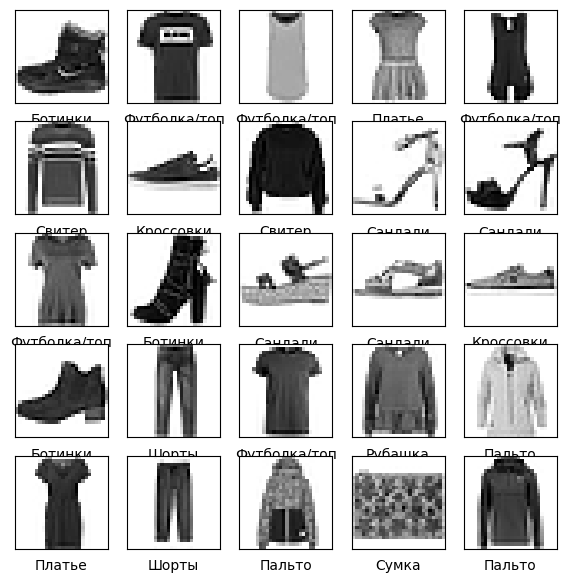

In [5]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Загрузка датасета Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize.
# пиксели в изображениях представлены значениями от 0 до 255, где 0 соответствует черному цвету, а 255 - белому цвету.
# после нормализации, значения пикселей будут находиться в диапазоне от 0 до 1,
# это упрощает обработку и обучение модели на этих данных.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Описание классов
# вместо цифровых индексов присвоили понятные метки классов для предсказании типов одежды на новых изображениях.
class_names = [
    'Футболка/топ', 'Шорты', 'Свитер', 'Платье', 'Пальто',
    'Сандали', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинки'
]
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Вывод нескольких изображений из обучающего набора данных
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
train_images.shape

(60000, 28, 28)

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [7]:
# "Flatten" (выравнивание).
# выполняется для преобразования двумерного массива изображений в одномерный массив.
# В случае датасета Fashion MNIST, исходные изображения имеют размерность 28x28 пикселей, что дает общее количество пикселей в каждом изображении равное 784.
# Преобразование данных из двумерного массива в одномерный массив позволяет подготовить данные для входа в нейронную сеть,
# которая ожидает одномерный вектор на входе.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

## Анализ датасета
Давайте посмотрим структуры полученного массива данных:

In [8]:
train_images.shape

(60000, 784)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [11]:
test_images.shape

(10000, 784)

In [12]:
len(test_labels)

10000

In [13]:
test_images[0].shape

(784,)

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [14]:
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
# Если вы уже выполнили операцию train_images = train_images.reshape((-1, 784)) и test_images = test_images.reshape((-1, 784))
# для преобразования входных данных в одномерный массив с формой (batch_size, 784),
# то не нужно добавлять слой keras.layers.Flatten с аргументом input_shape=(28, 28).

2023-07-13 17:07:39.953155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [15]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Тренировка модели
Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.

### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [16]:
hist = model.fit(train_images, train_labels, batch_size = 250, epochs=25)

Epoch 1/25
240/240 [==============================] - 5s 18ms/step - loss: 0.5535 - accuracy: 0.8077
Epoch 2/25
240/240 [==============================] - 5s 19ms/step - loss: 0.3705 - accuracy: 0.8645
Epoch 3/25
240/240 [==============================] - 6s 23ms/step - loss: 0.3272 - accuracy: 0.8801
Epoch 4/25
240/240 [==============================] - 6s 24ms/step - loss: 0.3014 - accuracy: 0.8876
Epoch 5/25
240/240 [==============================] - 5s 22ms/step - loss: 0.2889 - accuracy: 0.8919
Epoch 6/25
240/240 [==============================] - 5s 23ms/step - loss: 0.2676 - accuracy: 0.8989
Epoch 7/25
240/240 [==============================] - 6s 23ms/step - loss: 0.2548 - accuracy: 0.9046
Epoch 8/25
240/240 [==============================] - 5s 21ms/step - loss: 0.2483 - accuracy: 0.9057
Epoch 9/25
240/240 [==============================] - 6s 23ms/step - loss: 0.2381 - accuracy: 0.9104
Epoch 10/25
240/240 [==============================] - 5s 22ms/step - loss: 0.2219 - accura

In [17]:
print(tf.config.experimental.list_physical_devices("GPU"))

[]


In [18]:
tf.config.list_physical_devices('GPU')

[]

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3362 - accuracy: 0.8976 - 1s/epoch - 4ms/step

Test accuracy: 0.897599995136261


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiden_one (Dense)           (None, 256)               200960    
                                                                 
 hiden_two (Dense)           (None, 128)               32896     
                                                                 
 hiden_three (Dense)         (None, 64)                8256      
                                                                 
 hiden_four (Dense)          (None, 64)                4160      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 246,922
Trainable params: 246,922
Non-trainable params: 0
_________________________________________________________________


In [21]:
type(model.get_weights())

list

In [22]:
len(model.get_weights())

10

In [23]:
model.get_weights()[3].shape

(128,)

В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.
### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети -

In [24]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [26]:
predictions[0]

array([1.4593595e-06, 2.5400980e-06, 4.6127284e-13, 9.1433903e-13,
       2.0310076e-09, 5.1054199e-06, 1.2123341e-07, 3.2032680e-04,
       5.6495213e-09, 9.9967051e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

In [30]:
test_images.shape

(10000, 784)

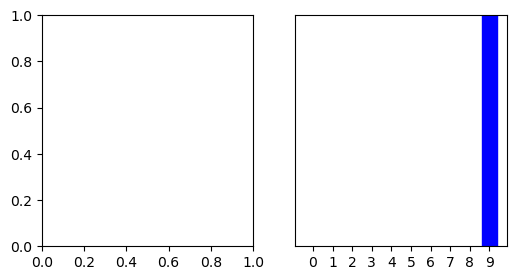

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

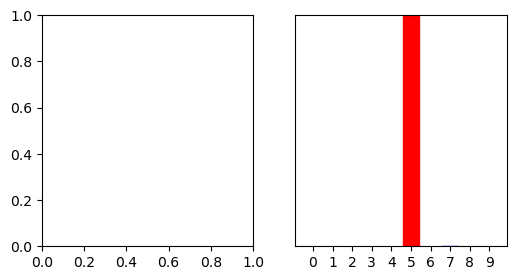

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [33]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
#for i in range(num_images):
 # plt.subplot(num_rows, 2*num_cols, 2*i+1)
  #plot_image(i, predictions[i], test_labels, test_images)
  #plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #lot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети -

In [34]:
img = test_images[1]

print(img.shape)

(784,)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 784)


In [36]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 44ms/step
[[6.0472812e-06 5.1332538e-10 9.9902654e-01 1.3105475e-07 7.5892120e-04
  2.9084784e-14 2.0841128e-04 2.0043074e-10 1.0793008e-08 2.0838827e-11]]


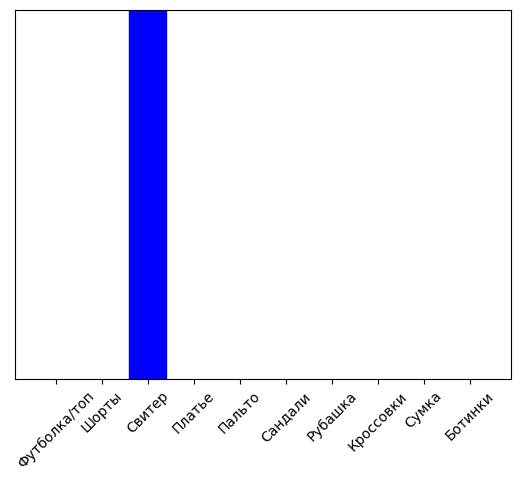

In [37]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [38]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

> Indented block

## Домашнее задание

- Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. - Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность
- Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке
* Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.
- Напишите в комментариях к уроку, какого результата вы добились от нейросети и что
помогло улучшить её точность

2023-07-13 23:58:20.239156: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


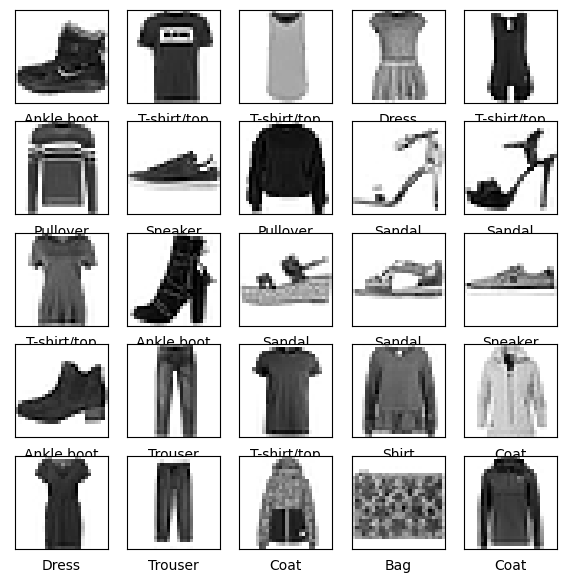

2023-07-13 23:58:30.388646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
469/469 [==============================] - 37s 78ms/step - loss: 0.4371 - accuracy: 0.8461
Epoch 2/20
469/469 [==============================] - 37s 80ms/step - loss: 0.2923 - accuracy: 0.8960
Epoch 3/20
469/469 [==============================] - 37s 79ms/step - loss: 0.2550 - accuracy: 0.9078
Epoch 4/20
469/469 [==============================] - 37s 78ms/step - loss: 0.2250 - accuracy: 0.9176
Epoch 5/20
469/469 [==============================] - 38s 80ms/step - loss: 0.2001 - accuracy: 0.9273
Epoch 6/20
469/469 [==============================] - 37s 79ms/step - loss: 0.1818 - accuracy: 0.9336
Epoch 7/20
469/469 [==============================] - 39s 83ms/step - loss: 0.1626 - accuracy: 0.9407
Epoch 8/20
469/469 [==============================] - 38s 81ms/step - loss: 0.1483 - accuracy: 0.9460
Epoch 9/20
469/469 [==============================] - 37s 78ms/step - loss: 0.1332 - accuracy: 0.9517
Epoch 10/20
469/469 [==============================] - 38s 81ms/step - loss: 0.120

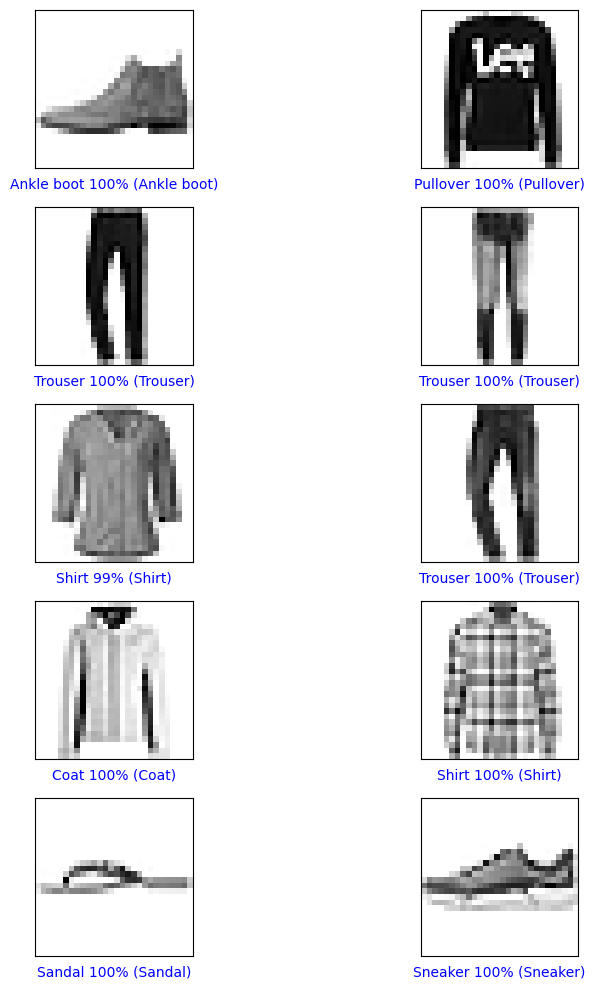

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Загрузим набор данных Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Сделаем нормализацию
train_images = train_images / 255.0
test_images = test_images / 255.0

# Преобразуем изображения в четырехмерные тензоры для CNN.
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Назначи классам имена.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Визуализируем некоторые изображения из обучающего набора данных
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Определим архитектуру модели
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Скомпилируем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучим модель
history = model.fit(train_images, train_labels, batch_size=128, epochs=20)

# Оценим модель на тестовом наборе данных
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Делаем прогнозы на тестовом наборе данных
predictions = model.predict(test_images)

# Построим изображение и его предсказанную метку
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

# Построим вероятности предсказания для изображения
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    this_plot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')

# Визуализируем прогнозы для всех классов
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

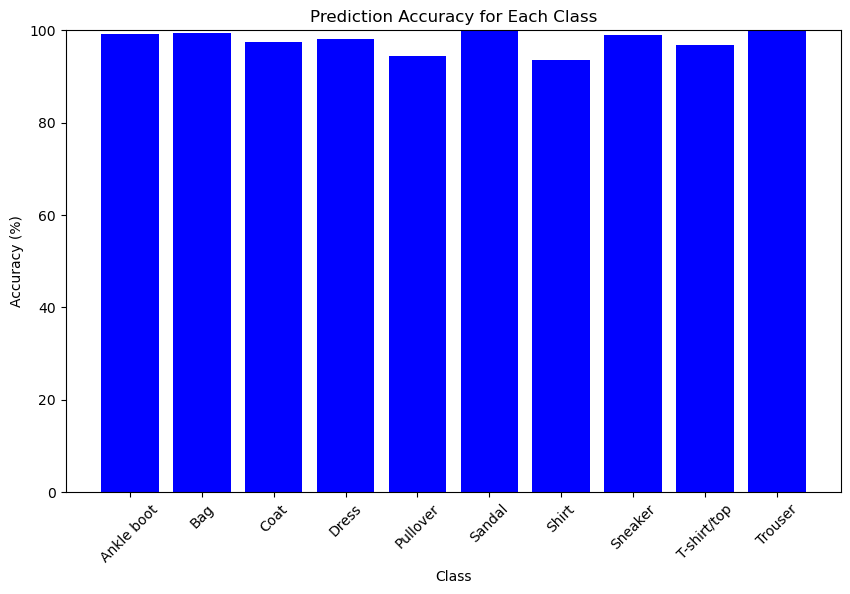

In [3]:
# Создаём словарь для хранения информации для каждого уникального правильно предсказанного класса.
class_info = {}

# Повторим набор тестовых данных и информацию для каждого правильно предсказанного объекта.
for i in range(len(test_labels)):
    true_label = test_labels[i]
    predicted_label = np.argmax(predictions[i])
    prediction_prob = np.max(predictions[i])
    
    if predicted_label == true_label:
        class_name = class_names[predicted_label]
        if class_name in class_info:
            class_info[class_name]['count'] += 1
            class_info[class_name]['accuracy'] += prediction_prob
        else:
            class_info[class_name] = {'count': 1, 'accuracy': prediction_prob}

# Построим график для каждого уникального правильно предсказанного класса.
plt.figure(figsize=(10, 6))
class_names_sorted = sorted(class_info.keys())
accuracies = [class_info[class_name]['accuracy'] / class_info[class_name]['count'] * 100 for class_name in class_names_sorted]
plt.bar(class_names_sorted, accuracies, color='blue')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.title('Prediction Accuracy for Each Class')
plt.xticks(rotation=45)
plt.ylim([0, 100])
plt.show()


- tf.data.Dataset:

Класс tf.data.Dataset используется для представления коллекций элементов данных в TensorFlow. Он предоставляет удобные методы для чтения, преобразования и обработки данных. Вы можете использовать tf.data.Dataset для загрузки данных, создания пайплайнов данных и выполнения операций над ними.

- tf.keras.callbacks:

Модуль tf.keras.callbacks содержит различные обратные вызовы, которые можно использовать во время обучения модели. Например, ModelCheckpoint сохраняет веса модели во время обучения, EarlyStopping прерывает обучение, если метрика перестает улучшаться, и TensorBoard позволяет визуализировать метрики и графы модели в TensorBoard.

- tf.distribute.Strategy:

tf.distribute.Strategy предоставляет возможности распределенного обучения моделей TensorFlow на нескольких устройствах или хостах. Он позволяет эффективно использовать графические процессоры (GPU) или многоядерные процессоры (CPU) для обучения модели.

- tf.function:

Декоратор tf.function преобразует обычные функции Python в графы TensorFlow, что позволяет выполнять эффективное вычисление с использованием автоматического дифференцирования и оптимизации. Это особенно полезно при оптимизации и экспорте моделей TensorFlow.

- tf.GradientTape:

Класс tf.GradientTape используется для вычисления градиентов в TensorFlow. Он позволяет автоматически вычислять градиенты относительно переменных в контексте "ленты". Это полезно для обратного распространения ошибки и обучения моделей с использованием градиентных методов оптимизации.

- tf.image:

Модуль tf.image предоставляет функции для обработки изображений в TensorFlow. Он содержит операции для изменения размера изображений, применения аугментаций данных, изменения яркости и контрастности и многое другое.

- tf.saved_model:

Модуль tf.saved_model предоставляет API для сохранения и загрузки моделей TensorFlow в формате SavedModel. SavedModel представляет модель в виде набора файлов, которые можно использовать для инференса или продолжения обучения модели в другом контексте.

- tf.data.experimental.preprocessing:

Модуль tf.data.experimental.preprocessing предоставляет функции предварительной обработки данных, которые можно использовать с tf.data.Dataset. Он содержит методы для нормализации данных, преобразования категориальных признаков в числовые, аугментации изображений и многое другое.